# Step 1 Data acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
col_lst = ['age','workclass','fnlwgt','education','education_num',
           'marital_status','occupation','relationship','race','sex',
          'capital_gain','capital_loss','hours_per_week','native_country','salary']

In [5]:
data.shape

(32561, 15)

In [6]:
data.columns=col_lst

In [7]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Step 2 Data preparation

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [10]:
cat_cols=[col for col in col_lst if isinstance(data[col][0],str)]

In [11]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [12]:
for col in cat_cols:
    print('Column name: {}', format(col),'\n', '-------------------------------------')
    print(data[col].value_counts())
   

Column name: {} workclass 
 -------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
Column name: {} education 
 -------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
Column name: {} marital_status 
 -------------------------------------
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 102

In [13]:
y =data['salary'].copy() # peel off the target variable

In [14]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [15]:
X = data[[col for col in data.columns if col != 'salary']].copy()
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify =y, random_state=42)
y_train.value_counts()

 <=50K    17303
 >50K      5489
Name: salary, dtype: int64

In [18]:
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

we did a stratified sample because of the unabalance class distribution in our target variable. we also noticed our baseline is 76% accuracy (24720/36561)

Let's address the missing values in our training data

separate data into categorical and numerical

In [19]:
categorical_df =X_train.select_dtypes(include=[object])


In [20]:
categorical_df.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
24029,Self-emp-not-inc,11th,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
8788,?,Some-college,Never-married,?,Own-child,White,Female,United-States
15564,Private,Some-college,Never-married,Other-service,Not-in-family,White,Female,United-States
9585,Private,10th,Never-married,Sales,Unmarried,White,Female,United-States
7377,Private,Some-college,Divorced,Other-service,Not-in-family,White,Female,United-States


In [21]:
numerical_df = X_train.select_dtypes(exclude=[object])

In [22]:
numerical_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
24029,43,96129,7,0,0,60
8788,18,276864,10,0,1602,20
15564,34,200192,10,0,0,40
9585,17,156736,6,0,0,12
7377,41,179580,10,0,0,36


In [23]:
categorical_df_nan = categorical_df.copy()
categorical_df_nan.replace(' ?',np.nan,inplace=True)
categorical_df_nan['occupation'].value_counts()

 Prof-specialty       2939
 Craft-repair         2862
 Exec-managerial      2856
 Adm-clerical         2580
 Sales                2572
 Other-service        2277
 Machine-op-inspct    1419
 Transport-moving     1118
 Handlers-cleaners     991
 Farming-fishing       672
 Tech-support          637
 Protective-serv       466
 Priv-house-serv       116
 Armed-Forces            6
Name: occupation, dtype: int64

In [24]:
#looks like there are some leading or trailing spaces with the question marks let's '

In [25]:
for value in X_train['occupation']:
    if '?' in value:
        print(len(value))
        break

2


In [26]:
categorical_df_nan.isnull().sum()

workclass         1275
education            0
marital_status       0
occupation        1281
relationship         0
race                 0
sex                  0
native_country     407
dtype: int64

let's impute the missing values for the categorcal with the mode 

In [27]:
def cat_imputer(df):
    # must be a pandas df
    for col in df.columns:
        df[col].fillna(value=df[col].mode()[0], inplace=True)
    return df

In [28]:
new_cat_df= cat_imputer(categorical_df_nan)

In [29]:
new_cat_df.isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

before making dummy variables. let's aggregate the small classes together in the  Native_country column

In [30]:
for col in new_cat_df.columns:
    print('class distribution for {}'.format(col), '\n')
    print(new_cat_df[col].value_counts(), '\n----------------------------\n')

class distribution for workclass 

 Private             17111
 Self-emp-not-inc     1784
 Local-gov            1498
 State-gov             915
 Self-emp-inc          790
 Federal-gov           675
 Without-pay            13
 Never-worked            6
Name: workclass, dtype: int64 
----------------------------

class distribution for education 

 HS-grad         7287
 Some-college    5084
 Bachelors       3723
 Masters         1242
 Assoc-voc        976
 11th             834
 Assoc-acdm       764
 10th             641
 7th-8th          463
 Prof-school      398
 9th              363
 12th             317
 Doctorate        288
 5th-6th          254
 1st-4th          123
 Preschool         35
Name: education, dtype: int64 
----------------------------

class distribution for marital_status 

 Married-civ-spouse       10448
 Never-married             7454
 Divorced                  3127
 Separated                  735
 Widowed                    712
 Married-spouse-absent      298
 Married

In [31]:
new_cat_df['native_country'] = [country if 'United-States' == country.strip() else 'Other' for country in new_cat_df['native_country']]

In [32]:
new_cat_df['native_country'].value_counts()

 United-States    20812
Other              1980
Name: native_country, dtype: int64

## let's check the numerical df

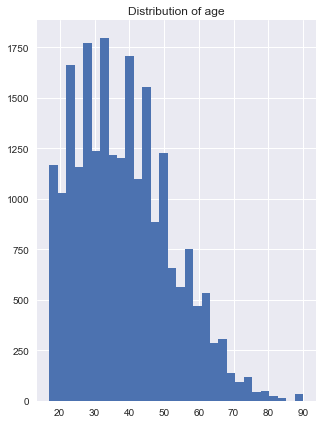

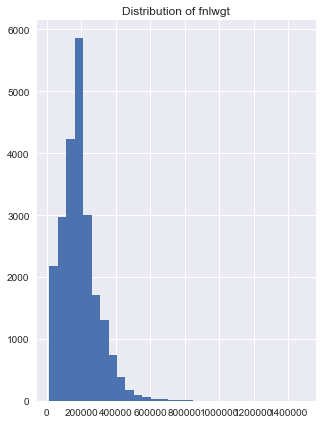

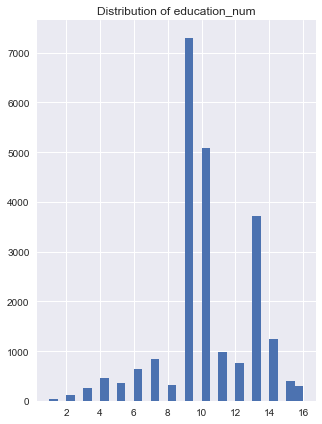

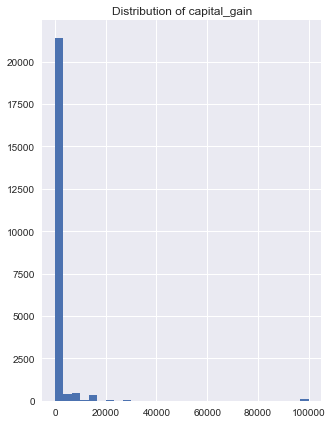

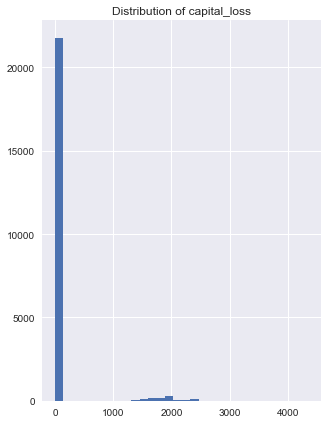

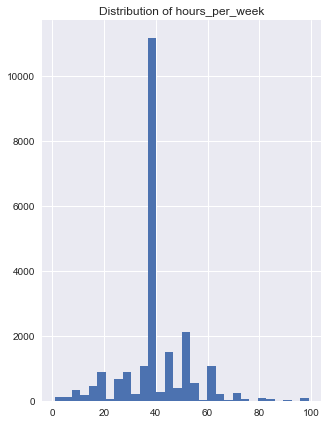

In [33]:
for col in numerical_df.columns:
    plt.figure(figsize=(5,7))
    plt.hist(numerical_df[col].values, bins=30)
    plt.title('Distribution of {}'.format(col))
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numerical_df_ss = pd.DataFrame(ss.fit_transform(numerical_df),
                             index=numerical_df.index,
                             columns=numerical_df.columns)
numerical_df_ss.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
24029,0.323996,-0.888359,-1.187429,-0.146047,-0.215155,1.572934
8788,-1.510030,0.818890,-0.028839,-0.146047,3.775441,-1.648494
15564,-0.336253,0.094635,-0.028839,-0.146047,-0.215155,-0.037780
9585,-1.583391,-0.315857,-1.573625,-0.146047,-0.215155,-2.292780
7377,0.177274,-0.100069,-0.028839,-0.146047,-0.215155,-0.359923


cerate for dummies variables for te categorical data 

In [35]:
for col in new_cat_df.columns:
    print('class distribution for {}'.format(col))

class distribution for workclass
class distribution for education
class distribution for marital_status
class distribution for occupation
class distribution for relationship
class distribution for race
class distribution for sex
class distribution for native_country


In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [47]:
cat_encoder = CategoricalEncoder(encoding='onehot-dense',handle_unknown='ignore')
cat_df_onehot = cat_encoder.fit_transform(new_cat_df)
cat_df_onehot = pd.DataFrame(cat_df_onehot,index=new_cat_df.index)

In [48]:
final_train_df = pd.concat([numerical_df,cat_df_onehot], axis=1, join='inner')

In [49]:
final_train_df.columns

Index([           'age',         'fnlwgt',  'education_num',   'capital_gain',
         'capital_loss', 'hours_per_week',                0,                1,
                      2,                3,                4,                5,
                      6,                7,                8,                9,
                     10,               11,               12,               13,
                     14,               15,               16,               17,
                     18,               19,               20,               21,
                     22,               23,               24,               25,
                     26,               27,               28,               29,
                     30,               31,               32,               33,
                     34,               35,               36,               37,
                     38,               39,               40,               41,
                     42,               43,          

In [50]:
final_train_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,0,1,2,3,...,50,51,52,53,54,55,56,57,58,59
24029,43,96129,7,0,0,60,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8788,18,276864,10,0,1602,20,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
15564,34,200192,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9585,17,156736,6,0,0,12,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
7377,41,179580,10,0,0,36,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [51]:
final_train_df.shape

(22792, 66)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [55]:
logreg = LogisticRegression()
dtr = DecisionTreeClassifier()

In [56]:
logreg.fit(final_train_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
logreg.score(final_train_df, y_train)

0.79747279747279742